<a href="https://colab.research.google.com/github/ashorinajufan/KUMPULAN-TUGAS-DATA-MINING-/blob/main/2304020184_Ashorina_Jufan_Data_Mining_(Na%C3%AFve_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelulusan mahasiswa merupakan salah satu indikator penting dalam mengukur keberhasilan proses pendidikan di perguruan tinggi. Status kelulusan tidak hanya dipengaruhi oleh satu faktor, tetapi merupakan hasil dari berbagai aspek akademik dan non-akademik, seperti Indeks Prestasi Semester (IPS), Indeks Prestasi Kumulatif (IPK), usia, status mahasiswa, serta kondisi sosial lainnya. Oleh karena itu, diperlukan suatu pendekatan analisis data untuk memahami pola dan faktor-faktor yang berkontribusi terhadap kelulusan mahasiswa.

Dalam penelitian ini, dataset yang digunakan memuat informasi akademik mahasiswa dari semester awal hingga semester akhir, termasuk nilai IPS 1 sampai IPS 8 serta IPK sebagai indikator performa akademik secara keseluruhan. Selain itu, terdapat variabel demografis seperti jenis kelamin, usia, dan status pernikahan yang dapat menjadi faktor pendukung dalam analisis.

Melalui pemanfaatan teknik klasifikasi dalam machine learning, khususnya algoritma Naïve Bayes, penelitian ini bertujuan untuk memprediksi status kelulusan mahasiswa berdasarkan data yang tersedia. Dengan pendekatan ini, diharapkan dapat diperoleh model yang mampu mengidentifikasi pola kelulusan secara sistematis, sehingga dapat menjadi bahan evaluasi maupun dasar pengambilan keputusan dalam meningkatkan kualitas pendidikan.

# **Prepocessing**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('/content/Kelulusan Test.csv', sep=';', on_bad_lines='skip')

# Tampilkan 5 data pertama
df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,"3,17","2,7","3,23","2,41",3,"2,47","1,75",0,"2,75",TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,"3,6","3,5","3,42","2,85","3,31","2,95","2,18",NaN,"3,39",TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,"2,67","2,66","2,93","3,14","2,92","2,64","2,88","0,5","2,81",TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,"2,48","2,86","2,09","2,55","2,55","2,43","2,55","2,17","2,82",TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,"3,19","3,08","3,31","2,83","3,36","2,73","3,06",0,"3,09",TEPAT


In [4]:
# Informasi dataset
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAMA              145 non-null    object
 1   JENIS KELAMIN     145 non-null    object
 2   STATUS MAHASISWA  145 non-null    object
 3   UMUR              145 non-null    int64 
 4   STATUS NIKAH      145 non-null    object
 5   IPS 1             145 non-null    object
 6   IPS 2             145 non-null    object
 7   IPS 3             145 non-null    object
 8   IPS 4             145 non-null    object
 9   IPS 5             145 non-null    object
 10  IPS 6             145 non-null    object
 11  IPS 7             145 non-null    object
 12  IPS 8             141 non-null    object
 13  IPK               142 non-null    object
 14  STATUS KELULUSAN  145 non-null    object
dtypes: int64(1), object(14)
memory usage: 17.1+ KB
None

Statistik Deskriptif:
             U

Penjelasan:
Berdasarkan hasil pemeriksaan menggunakan fungsi df.info(), dataset yang digunakan terdiri dari 145 entri dengan 15 kolom. Seluruh data memiliki indeks dari 0 hingga 144. Dari total 15 kolom tersebut, terdapat 1 kolom bertipe numerik (int64) yaitu UMUR, sedangkan 14 kolom lainnya bertipe object yang menunjukkan data kategorikal.

Kolom-kolom dalam dataset meliputi: NAMA, JENIS KELAMIN, STATUS MAHASISWA, UMUR, STATUS NIKAH, IPS 1 hingga IPS 8, IPK, dan STATUS KELULUSAN. Kolom STATUS KELULUSAN merupakan variabel target yang digunakan dalam proses klasifikasi untuk memprediksi apakah mahasiswa dinyatakan lulus atau tidak.

Berdasarkan informasi non-null count, hampir seluruh kolom memiliki 145 data lengkap. Namun terdapat sedikit kekurangan data pada kolom IPS 8 (141 non-null) dan IPK (142 non-null), yang berarti terdapat beberapa nilai yang hilang (missing values) pada kedua variabel tersebut. Hal ini perlu diperhatikan pada tahap preprocessing karena data yang hilang dapat memengaruhi performa model klasifikasi.

Sebagian besar kolom bertipe object karena nilai IPS kemungkinan masih terbaca sebagai teks, bukan numerik. Oleh karena itu, sebelum dilakukan analisis statistik maupun penerapan algoritma Naïve Bayes, diperlukan proses konversi tipe data (data type conversion) dan encoding agar model dapat memproses data dengan optimal.

Secara keseluruhan, dataset ini memiliki struktur yang jelas dan relevan untuk analisis prediksi kelulusan mahasiswa, dengan variabel-variabel akademik seperti IPS tiap semester dan IPK yang berpotensi menjadi faktor utama dalam menentukan status kelulusan.

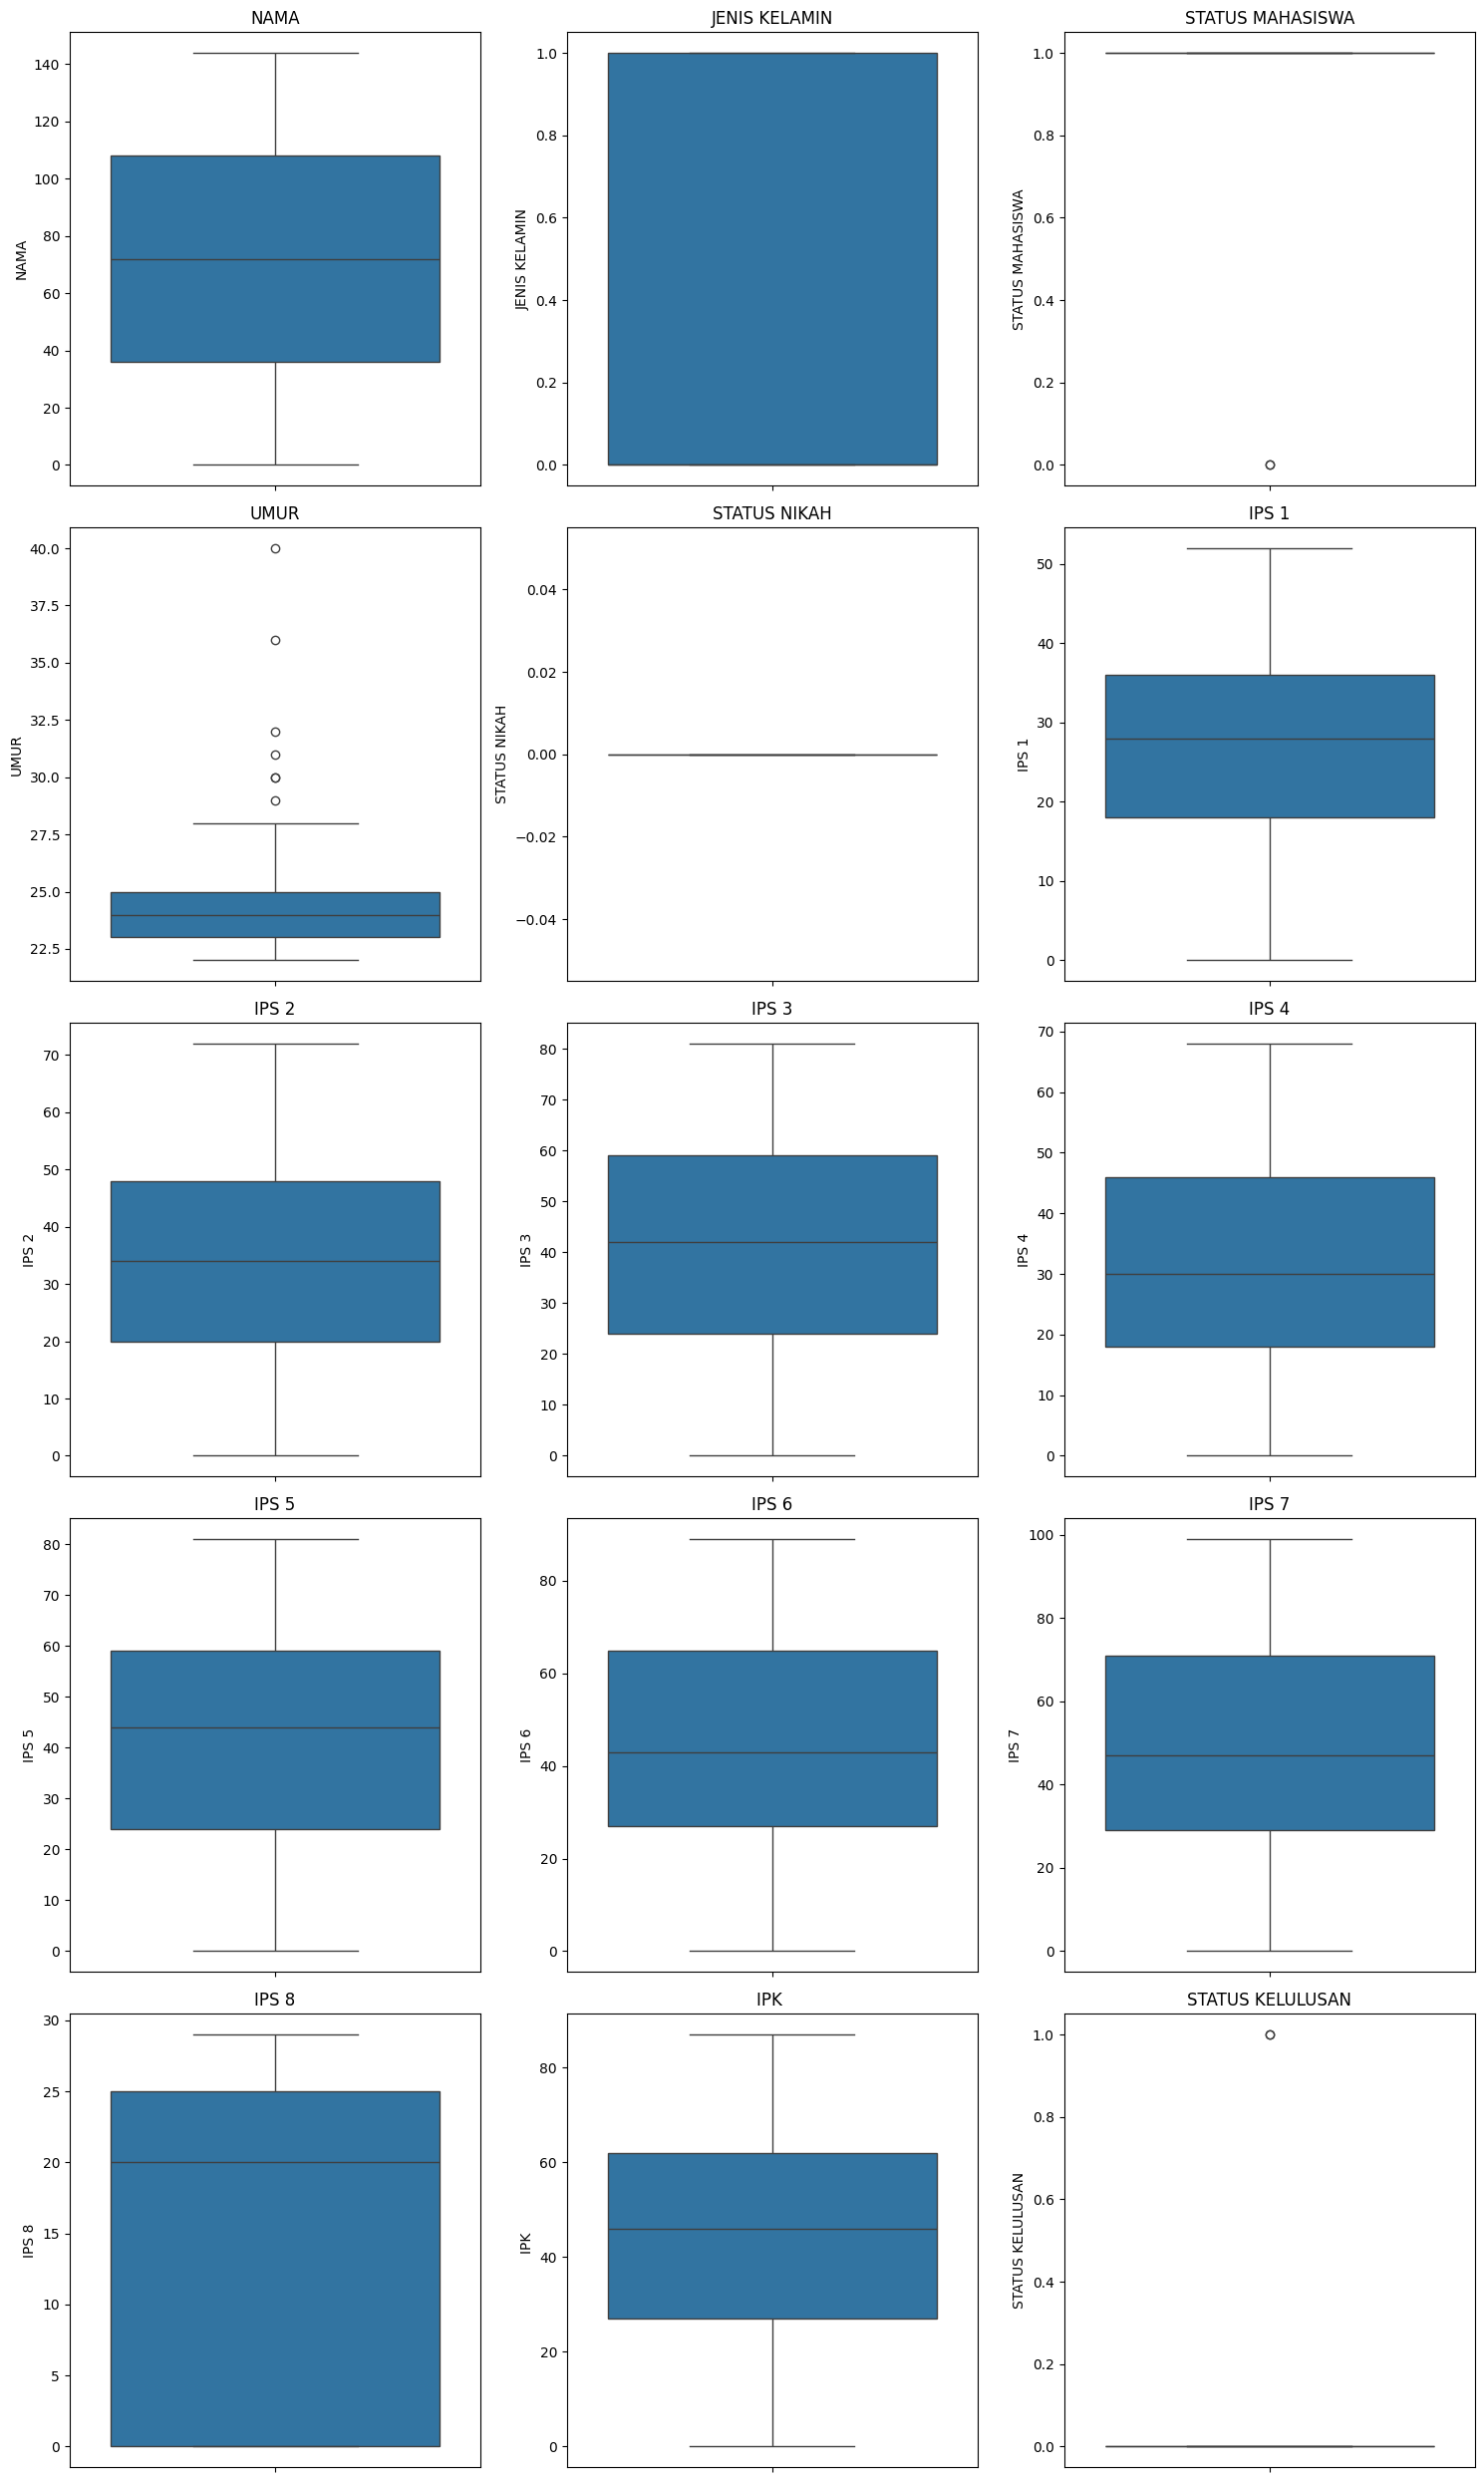

In [38]:
import math

cols = df.columns
n_cols = len(cols)

# Tentukan jumlah kolom grid
grid_col = 3
grid_row = math.ceil(n_cols / grid_col)

fig, axes = plt.subplots(grid_row, grid_col, figsize=(15, 5*grid_row))
axes = axes.flatten()

for i, col in enumerate(cols):
    if df[col].dtype == 'object':
        sns.countplot(x=df[col], ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
    else:
        sns.boxplot(y=df[col], ax=axes[i])

    axes[i].set_title(col)

# Hapus subplot kosong kalau ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Penjelasan:

Berdasarkan hasil visualisasi boxplot pada dataset Kelulusan Test, dapat diamati adanya indikasi nilai-nilai yang menyimpang pada beberapa variabel numerik. Boxplot membantu memperlihatkan sebaran data melalui median, kuartil, serta batas whiskers, sehingga titik yang berada di luar batas tersebut dapat diidentifikasi sebagai outlier.

Pada beberapa kolom nilai akademik, terlihat adanya titik yang berada cukup jauh dari rentang mayoritas data. Hal ini menunjukkan adanya mahasiswa dengan nilai yang sangat rendah atau sangat tinggi dibandingkan dengan sebagian besar responden lainnya. Kondisi tersebut dapat mencerminkan perbedaan kemampuan akademik yang signifikan dalam populasi.

Sementara itu, pada variabel seperti usia, distribusi data cenderung lebih terkonsentrasi dan tidak menunjukkan banyak penyimpangan ekstrem. Hal ini mengindikasikan bahwa rentang usia mahasiswa relatif homogen dibandingkan variasi pada nilai akademik.

Keberadaan outlier dalam dataset ini dapat memberikan informasi penting, terutama dalam konteks analisis prediksi kelulusan. Nilai yang sangat tinggi atau sangat rendah bisa saja menjadi faktor penentu dalam klasifikasi. Namun demikian, perlu dilakukan pertimbangan lebih lanjut apakah data tersebut merupakan variasi alami atau kesalahan pencatatan. Keputusan untuk mempertahankan atau menghapus outlier harus disesuaikan dengan tujuan analisis agar tidak mengurangi validitas hasil penelitian.

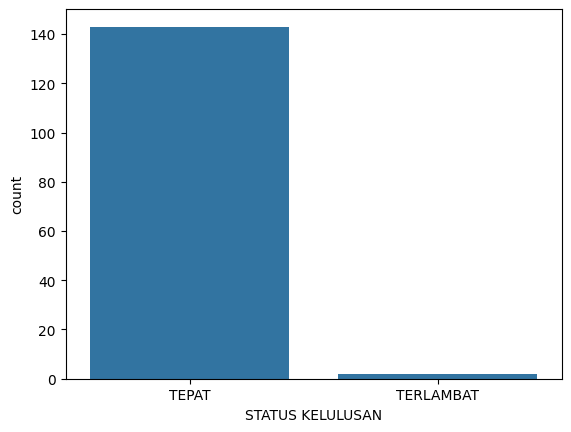

In [14]:
sns.countplot(x='STATUS KELULUSAN', data=df)
plt.show()

In [26]:
# ------------------- Preprocessing -------------------
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original 'df' in place for subsequent operations
df_processed = df.copy()

# Drop the 'NAMA' column as it is likely an identifier and not a feature for the model
df_processed = df_processed.drop('NAMA', axis=1)

# Convert 'IPS' columns (IPS 1 to IPS 8) and 'IPK' to numeric
# Replace comma with dot for decimal separation and coerce errors to NaN
ips_ipk_cols = [f'IPS {i}' for i in range(1, 9)] + ['IPK']
for col in ips_ipk_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].astype(str).str.replace(',', '.', regex=False)
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        # Impute missing values with the median of the column
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

# Apply LabelEncoder to remaining object columns (which are truly categorical)
le = LabelEncoder()
for col in df_processed.select_dtypes(include='object').columns:
    # Exclude 'STATUS KELULUSAN' for now, it will be handled as target 'y'
    if col != 'STATUS KELULUSAN':
        df_processed[col] = le.fit_transform(df_processed[col])

# Now, define X and y from the fully preprocessed dataframe
X = df_processed.drop('STATUS KELULUSAN', axis=1)
y = df_processed['STATUS KELULUSAN']

# Encode the target variable y as well
y = le.fit_transform(y)

/tmp/ipython-input-4255428446.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].median(), inplace=True)
/tmp/ipython-input-4255428446.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [29]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# **Naïve Bayes**
Naïve Bayes adalah salah satu algoritma pembelajaran induktif yang paling efektif dan efisien dalam bidang machine learning dan data mining. Algoritma ini memiliki performa yang kompetitif dalam proses klasifikasi meskipun menggunakan asumsi keindependenan antar atribut (tidak terdapat keterkaitan antar fitur). Pada kenyataannya, asumsi keindependenan atribut jarang sepenuhnya terpenuhi dalam data nyata. Namun demikian, berbagai penelitian empiris menunjukkan bahwa meskipun asumsi tersebut dilanggar, performa klasifikasi Naïve Bayes tetap menunjukkan tingkat akurasi yang cukup tinggi.

Pada dataset ini, algoritma Naïve Bayes digunakan untuk menghitung probabilitas kelulusan mahasiswa berdasarkan atribut-atribut yang tersedia, seperti nilai akademik dan karakteristik lainnya. Model akan menentukan peluang seorang mahasiswa termasuk dalam kategori Lulus atau Tidak Lulus dengan menghitung probabilitas posterior berdasarkan Teorema Bayes. Hasil klasifikasi diperoleh dari kelas dengan nilai probabilitas tertinggi, sehingga dapat digunakan untuk memprediksi status kelulusan mahasiswa secara sistematis dan terukur.

In [33]:
# ------------------- Naive Bayes -------------------
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
y_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

**OUTPUT**

In [35]:
# ------------------- Evaluasi Model -------------------
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 1.0
[[29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


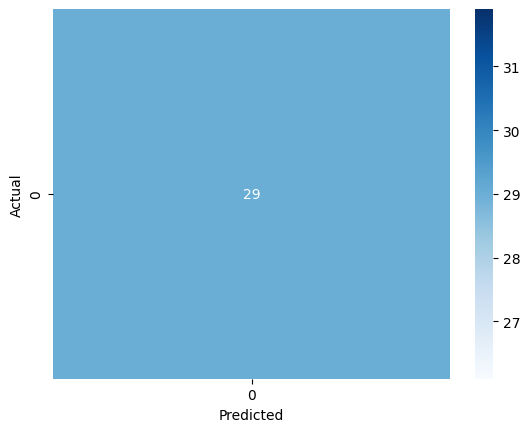

In [37]:
# ================= Visualisasi Confusion Matrix =================
sns.heatmap(confusion_matrix(y_test, y_pred_nb),
            annot=True,
            fmt='d',
            cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Penjelasan:
Berdasarkan hasil evaluasi menggunakan confusion matrix, terlihat bahwa seluruh data uji diklasifikasikan ke dalam satu kelas saja, yaitu kelas 0. Nilai pada matriks menunjukkan angka 29, yang berarti terdapat 29 data aktual kelas 0 yang berhasil diprediksi dengan benar sebagai kelas 0. Tidak terlihat adanya prediksi untuk kelas lainnya.

Hal ini menunjukkan bahwa model Naïve Bayes hanya memprediksi satu kategori pada data testing. Jika memang data uji hanya berisi satu kelas (misalnya seluruhnya “Tidak Lulus”), maka akurasi model akan terlihat sangat tinggi karena semua prediksi benar. Namun, jika sebenarnya terdapat dua kelas tetapi model tetap memprediksi satu kelas saja, maka hal ini menandakan adanya masalah seperti:

1. Distribusi kelas yang tidak seimbang (imbalanced data).
2. Data training yang kurang representatif.
3. Proses preprocessing atau encoding yang kurang tepat.
4. Fitur yang kurang mampu membedakan antar kelas.

Secara evaluasi, meskipun nilai akurasi bisa saja tinggi, model seperti ini belum dapat dikatakan baik karena tidak mampu membedakan kedua kelas secara efektif. Model yang baik seharusnya mampu memprediksi baik kelas 0 maupun kelas 1 sesuai dengan kondisi aktual.

Oleh karena itu, perlu dilakukan pengecekan lebih lanjut terhadap distribusi data (misalnya dengan value_counts() pada kolom STATUS_KELULUSAN), serta memastikan bahwa pembagian data training dan testing sudah menggunakan parameter stratify=y agar distribusi kelas tetap seimbang.